In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame(pd.read_csv("acoustic_Features.csv"))
df = df.copy()
df.columns

Index(['Class', '_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean',
       '_Tempo_Mean', '_MFCC_Mean_1', '_MFCC_Mean_2', '_MFCC_Mean_3',
       '_MFCC_Mean_4', '_MFCC_Mean_5', '_MFCC_Mean_6', '_MFCC_Mean_7',
       '_MFCC_Mean_8', '_MFCC_Mean_9', '_MFCC_Mean_10', '_MFCC_Mean_11',
       '_MFCC_Mean_12', '_MFCC_Mean_13', '_Roughness_Mean', '_Roughness_Slope',
       '_Zero-crossingrate_Mean', '_AttackTime_Mean', '_AttackTime_Slope',
       '_Rolloff_Mean', '_Eventdensity_Mean', '_Pulseclarity_Mean',
       '_Brightness_Mean', '_Spectralcentroid_Mean', '_Spectralspread_Mean',
       '_Spectralskewness_Mean', '_Spectralkurtosis_Mean',
       '_Spectralflatness_Mean', '_EntropyofSpectrum_Mean',
       '_Chromagram_Mean_1', '_Chromagram_Mean_2', '_Chromagram_Mean_3',
       '_Chromagram_Mean_4', '_Chromagram_Mean_5', '_Chromagram_Mean_6',
       '_Chromagram_Mean_7', '_Chromagram_Mean_8', '_Chromagram_Mean_9',
       '_Chromagram_Mean_10', '_Chromagram_Mean_11', '_Chromagram_Mean_12

In [4]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [5]:
X = df.drop(["Class"], axis = 1)
y = df["Class"]

### Naive-Bayes

In [6]:
cross_list_accuracy_naive = []
cross_list_precision_naive = []
cross_list_recall_naive = []
cross_list_f1_naive = []

kfold_naive = KFold(n_splits=10, shuffle=True, random_state=42)
Kfold_model_naive = GaussianNB()

for i in range(0,10):
    cross_list_accuracy_naive.append(cross_val_score(Kfold_model_naive, X, y, cv = kfold_naive, scoring=make_scorer(accuracy_score)).mean())
    cross_list_precision_naive.append(cross_val_score(Kfold_model_naive, X, y, cv = kfold_naive, scoring=make_scorer(precision_score, average = "weighted")).mean())
    cross_list_recall_naive.append(cross_val_score(Kfold_model_naive, X, y, cv = kfold_naive, scoring=make_scorer(recall_score, average = "weighted")).mean())
    cross_list_f1_naive.append(cross_val_score(Kfold_model_naive, X, y, cv = kfold_naive, scoring=make_scorer(f1_score, average = "weighted")).mean())




In [7]:
cross_list_accuracy_naive


[0.6825,
 0.6825,
 0.6825,
 0.6825,
 0.6825,
 0.6825,
 0.6825,
 0.6825,
 0.6825,
 0.6825]

#### Naive-Bayes F1 score

In [6]:
total_f1_naive = 0
avg_f1_naive = 0

for i in range(0,10):
    total_f1_naive += cross_list_f1_naive[i]
    
avg_f1_naive = total_f1_naive / 10
avg_f1_naive


0.6699698765375109

#### Naive-Bayes Accuracy Score

In [7]:
total_accuracy_naive = 0
avg_accuracy_naive = 0

for i in range(0,10):
    total_accuracy_naive += cross_list_accuracy_naive[i]
    
avg_accuracy_naive = total_accuracy_naive / 10
avg_accuracy_naive

0.6825

#### Naive-Bayes Recall Score

In [8]:
total_recall_naive = 0
avg_recall_naive = 0

for i in range(0,10):
    total_recall_naive += cross_list_recall_naive[i]
    
avg_recall_naive = total_recall_naive / 10
avg_recall_naive

0.6825

#### Naive-Bayes Precision Score

In [9]:
total_precision_naive = 0
avg_precision_naive = 0

for i in range(0,10):
    total_precision_naive += cross_list_precision_naive[i]
    
avg_precision_naive = total_precision_naive / 10
avg_precision_naive

0.7010925844988344

Text(0.5, 1.0, 'Results')

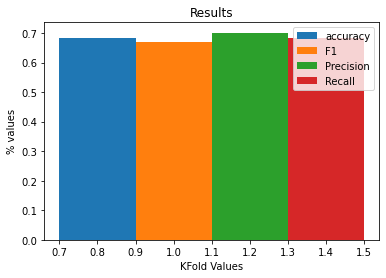

In [10]:
x_index = 1
en = 0.20

fig = plt.figure()
ax = plt.axes()

plt.bar(x_index-en, avg_accuracy_naive, width=en, label = "accuracy")
plt.bar(x_index, avg_f1_naive, width=en, label = "F1")
plt.bar(x_index+en, avg_precision_naive, width=en, label = "Precision")
plt.bar(x_index+2*en, avg_recall_naive, width=en, label = "Recall")

plt.legend()

plt.xlabel("KFold Values")
plt.ylabel("% values")
plt.title("Results")

### Random Forests

In [11]:
cross_list_accuracy_rf = []
cross_list_precision_rf = []
cross_list_recall_rf = []
cross_list_f1_rf = []

kfold_rf = KFold(n_splits=10, shuffle=True, random_state=55)
Kfold_model_rf = RandomForestClassifier()

for i in range(0,10):
    cross_list_accuracy_rf.append(cross_val_score(Kfold_model_rf, X, y, cv = kfold_rf, scoring=make_scorer(accuracy_score)).mean())
    cross_list_precision_rf.append(cross_val_score(Kfold_model_rf, X, y, cv = kfold_rf, scoring=make_scorer(precision_score, average = "weighted")).mean())
    cross_list_recall_rf.append(cross_val_score(Kfold_model_rf, X, y, cv = kfold_rf, scoring=make_scorer(recall_score, average = "weighted")).mean())
    cross_list_f1_rf.append(cross_val_score(Kfold_model_rf, X, y, cv = kfold_rf, scoring=make_scorer(f1_score, average = "weighted")).mean())

In [12]:
cross_list_accuracy_rf

[0.7899999999999999,
 0.8075000000000001,
 0.805,
 0.7699999999999999,
 0.7999999999999999,
 0.79,
 0.7925000000000001,
 0.7825,
 0.79,
 0.7925000000000001]

#### RF F1 score

In [12]:
total_f1_rf = 0
avg_f1_rf = 0

for i in range(0,10):
    total_f1_rf += cross_list_f1_rf[i]
    
avg_f1_rf = total_f1_rf / 10
avg_f1_rf

0.7941998757627555

#### RF Accuracy Score

In [13]:
total_accuracy_rf = 0
avg_accuracy_rf = 0

for i in range(0,10):
    total_accuracy_rf += cross_list_accuracy_rf[i]
    
avg_accuracy_rf = total_accuracy_rf / 10
avg_accuracy_rf

0.79375

#### RF Recall Score

In [14]:
total_recall_rf = 0
avg_recall_rf = 0

for i in range(0,10):
    total_recall_rf += cross_list_recall_rf[i]
    
avg_recall_rf = total_recall_rf / 10
avg_recall_rf

0.7955000000000001

#### RF Precision Score

In [15]:
total_precision_rf = 0
avg_precision_rf = 0

for i in range(0,10):
    total_precision_rf += cross_list_precision_rf[i]
    
avg_precision_rf = total_precision_rf / 10
avg_precision_rf

0.8207910174180395

Text(0.5, 1.0, 'Results')

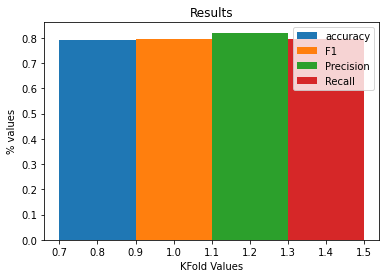

In [16]:
x_index = 1
en = 0.20

fig = plt.figure()
ax = plt.axes()

plt.bar(x_index-en, avg_accuracy_rf, width=en, label = "accuracy")
plt.bar(x_index, avg_f1_rf, width=en, label = "F1")
plt.bar(x_index+en, avg_precision_rf, width=en, label = "Precision")
plt.bar(x_index+2*en, avg_recall_rf, width=en, label = "Recall")

plt.legend()

plt.xlabel("KFold Values")
plt.ylabel("% values")
plt.title("Results")

### KNN

In [20]:
cross_list_accuracy_knn = []
cross_list_precision_knn = []
cross_list_recall_knn = []
cross_list_f1_knn = []

kfold_knn = KFold(n_splits=10, shuffle=True, random_state=65)
for i in range(1,30)
Kfold_model_knn = KNeighborsClassifier(n_neighbors = i)

for i in range(0,10):
    cross_list_accuracy_knn.append(cross_val_score(Kfold_model_knn, X, y, cv = kfold_knn, scoring=make_scorer(accuracy_score)).mean())
    cross_list_precision_knn.append(cross_val_score(Kfold_model_knn, X, y, cv = kfold_knn, scoring=make_scorer(precision_score, average = "weighted")).mean())
    cross_list_recall_knn.append(cross_val_score(Kfold_model_knn, X, y, cv = kfold_knn, scoring=make_scorer(recall_score, average = "weighted")).mean())
    cross_list_f1_knn.append(cross_val_score(Kfold_model_knn, X, y, cv = kfold_knn, scoring=make_scorer(f1_score, average = "weighted")).mean())

In [21]:
cross_list_precision_knn

[0.4994541359590703,
 0.4994541359590703,
 0.4994541359590703,
 0.4994541359590703,
 0.4994541359590703,
 0.4994541359590703,
 0.4994541359590703,
 0.4994541359590703,
 0.4994541359590703,
 0.4994541359590703]

#### KNN F1 Score

In [20]:
total_f1_knn = 0
avg_f1_knn = 0

for i in range(0,10):
    total_f1_knn += cross_list_f1_knn[i]
    
avg_f1_knn = total_f1_knn / 10
avg_f1_knn

0.5028731856827341

#### KNN Accuracy Score

In [26]:
total_accuracy_knn = 0
avg_accuracy_knn = 0

for i in range(0,10):
    total_accuracy_knn += cross_list_accuracy_knn[i]
    
avg_accuracy_knn = total_accuracy_knn / 10
avg_accuracy_knn

0.5199999999999999

#### KNN Recall Score

In [25]:
total_recall_knn = 0
avg_recall_knn = 0

for i in range(0,10):
    total_recall_knn += cross_list_recall_knn[i]
    
avg_recall_knn = total_recall_knn / 10
avg_recall_knn

0.5199999999999999

#### KNN Precision Score

In [24]:
total_precision_knn = 0
avg_precision_knn = 0

for i in range(0,10):
    total_precision_knn += cross_list_precision_knn[i]
    
avg_precision_knn = total_precision_knn / 10
avg_precision_knn

0.5290536981400952

Text(0.5, 1.0, 'Results')

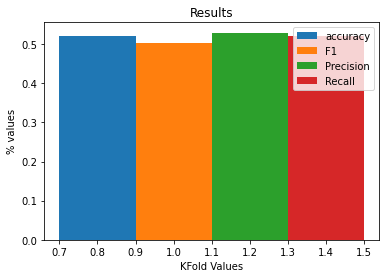

In [27]:
x_index = 1
en = 0.20

fig = plt.figure()
ax = plt.axes()

plt.bar(x_index-en, avg_accuracy_knn, width=en, label = "accuracy")
plt.bar(x_index, avg_f1_knn, width=en, label = "F1")
plt.bar(x_index+en, avg_precision_knn, width=en, label = "Precision")
plt.bar(x_index+2*en, avg_recall_knn, width=en, label = "Recall")

plt.legend()

plt.xlabel("KFold Values")
plt.ylabel("% values")
plt.title("Results")

### Comparing Metrices

#### Accuracy score

Text(0.5, 1.0, 'Results')

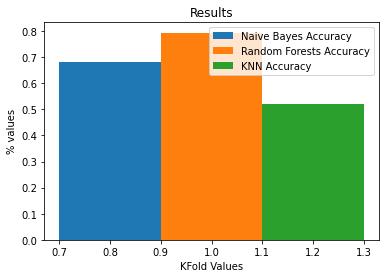

In [28]:
x_index = 1
en = 0.20

fig = plt.figure()
ax = plt.axes()

plt.bar(x_index-en, avg_accuracy_naive, width=en, label = "Naive Bayes Accuracy")
plt.bar(x_index, avg_accuracy_rf, width=en, label = "Random Forests Accuracy")
plt.bar(x_index+en, avg_accuracy_knn, width=en, label = "KNN Accuracy")

plt.legend()

plt.xlabel("KFold Values")
plt.ylabel("% values")
plt.title("Results")

#### F1 Score

Text(0.5, 1.0, 'Results')

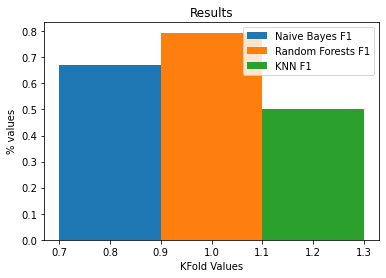

In [29]:
x_index = 1
en = 0.20

fig = plt.figure()
ax = plt.axes()

plt.bar(x_index-en, avg_f1_naive, width=en, label = "Naive Bayes F1")
plt.bar(x_index, avg_f1_rf, width=en, label = "Random Forests F1")
plt.bar(x_index+en, avg_f1_knn, width=en, label = "KNN F1")

plt.legend()

plt.xlabel("KFold Values")
plt.ylabel("% values")
plt.title("Results")

#### Precision Score

Text(0.5, 1.0, 'Results')

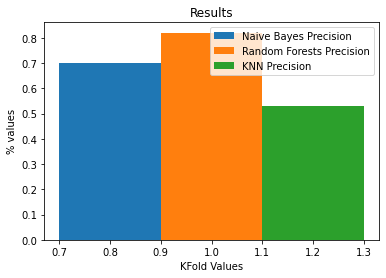

In [30]:
x_index = 1
en = 0.20

fig = plt.figure()
ax = plt.axes()

plt.bar(x_index-en, avg_precision_naive, width=en, label = "Naive Bayes Precision")
plt.bar(x_index, avg_precision_rf, width=en, label = "Random Forests Precision")
plt.bar(x_index+en, avg_precision_knn, width=en, label = "KNN Precision")

plt.legend()

plt.xlabel("KFold Values")
plt.ylabel("% values")
plt.title("Results")

#### Recall Score

Text(0.5, 1.0, 'Results')

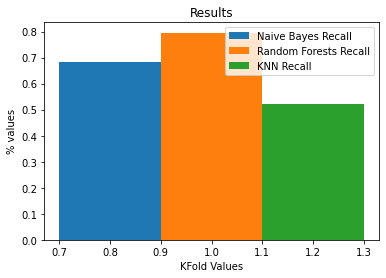

In [31]:
x_index = 1
en = 0.20

fig = plt.figure()
ax = plt.axes()

plt.bar(x_index-en, avg_recall_naive, width=en, label = "Naive Bayes Recall")
plt.bar(x_index, avg_recall_rf, width=en, label = "Random Forests Recall")
plt.bar(x_index+en, avg_recall_knn, width=en, label = "KNN Recall")

plt.legend()

plt.xlabel("KFold Values")
plt.ylabel("% values")
plt.title("Results")